## Sleep in Mammals

### Description

Includes brain and body weight, life span, gestation time, time sleeping, and predation and danger indices for 62 species of mammals. Of interest is to predict the time spent sleeping and the proportion of sleep time in dream sleep.

Variable		Description
BodyWt		body weight (kg)
BrainWt		brain weight (g)
NonDreaming		slow wave ("nondreaming") sleep (hrs/day)
Dreaming		paradoxical ("dreaming") sleep (hrs/day)
TotalSleep		total sleep, sum of slow wave and paradoxical sleep (hrs/day)
LifeSpan		maximum life span (years)
Gestation		gestation time (days)
Predation		predation index (1-5)
1 = minimum (least likely to be preyed upon); 5 = maximum (most likely to be preyed upon)
Exposure		sleep exposure index (1-5)
1 = least exposed (e.g. animal sleeps in a well-protected den); 5 = most exposed
Danger		overall danger index (1-5) (based on the above two indices and other information)
1 = least danger (from other animals); 5 = most danger (from other animals)

### Source

Allison, T., and Cicchetti, D. V. (1976). Sleep in mammals: ecological and constitutional correlates. Science 194 (November 12), 732-734.

The electronic data file was obtained from the Statlib database.


In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [30]:
# Read the csv file into a pandas DataFrame
sleep = pd.read_csv('sleep.csv')
sleep.head(20)

,Species,BodyWt,BrainWt,NonDreaming,Dreaming,TotalSleep,LifeSpan,Gestation,Predation,Exposure,Danger
0,Africanelephant,6654.000,5712.0,NaN,NaN,3.3,38.6,645.0,3,5,3
1,Africangiantpouchedrat,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3
2,ArcticFox,3.385,44.5,NaN,NaN,12.5,14.0,60.0,1,1,1
3,Arcticgroundsquirrel,0.920,5.7,NaN,NaN,16.5,NaN,25.0,5,2,3
4,Asianelephant,2547.000,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4
5,Baboon,10.550,179.5,9.1,0.7,9.8,27.0,180.0,4,4,4
6,Bigbrownbat,0.023,0.3,15.8,3.9,19.7,19.0,35.0,1,1,1
7,Braziliantapir,160.000,169.0,5.2,1.0,6.2,30.4,392.0,4,5,4
8,Cat,3.300,25.6,10.9,3.6,14.5,28.0,63.0,1,2,1
9,Chimpanzee,52.160,440.0,8.3,1.4,9.7,50.0,230.0,1,1,1


In [31]:
# Data Cleaning
sleep = sleep.fillna(sleep.mean())
sleep.head()

,Species,BodyWt,BrainWt,NonDreaming,Dreaming,TotalSleep,LifeSpan,Gestation,Predation,Exposure,Danger
0,Africanelephant,6654.000,5712.0,8.672917,1.972,3.3,38.600000,645.0,3,5,3
1,Africangiantpouchedrat,1.000,6.6,6.300000,2.000,8.3,4.500000,42.0,3,1,3
2,ArcticFox,3.385,44.5,8.672917,1.972,12.5,14.000000,60.0,1,1,1
3,Arcticgroundsquirrel,0.920,5.7,8.672917,1.972,16.5,19.877586,25.0,5,2,3
4,Asianelephant,2547.000,4603.0,2.100000,1.800,3.9,69.000000,624.0,3,5,4


In [32]:
# Assign the data to X and y

X = sleep[['BodyWt', 'BrainWt', 'NonDreaming', 'Dreaming', 'LifeSpan', 'Gestation']]
y = sleep["TotalSleep"].values.reshape(-1, 1)
print(X.shape, y.shape)

(62, 6) (62, 1)


## Important Step! (Model - Fit - Predict)

In [33]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

In [34]:
# Create a Linear Regression Model
from sklearn.linear_model import LinearRegression
classifier = LinearRegression()
classifier

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [35]:
# Fit the model to the data
classifier.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [36]:
# Calculate the Score
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.871492984581729
Testing Data Score: 0.7960300986564894


### Make Predictions

In [37]:
# Make Predictions
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[0:10]}")
print(f"First 10 Actual labels: {y_test[0:10].tolist()}")

First 10 Predictions:   [[10.53593633]
 [12.3237719 ]
 [10.55853979]
 [16.31598225]
 [ 8.21819612]
 [ 5.32614548]
 [10.71722193]
 [10.74934496]
 [ 9.60966191]
 [19.2037009 ]]
First 10 Actual labels: [[10.9], [12.5], [10.7], [17.0], [10.532758620689648], [5.4], [12.5], [13.0], [12.0], [19.9]]


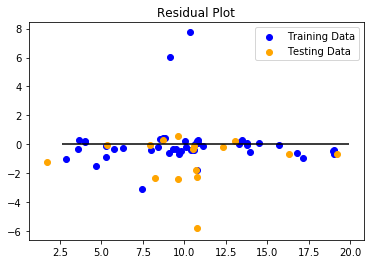

In [38]:
# Plot the Residuals for the Training and Testing data

plt.scatter(classifier.predict(X_train), classifier.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(classifier.predict(X_test), classifier.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")